## Week 10: Decision Trees

```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
In this lab, you will practice simple deep learning model in Pytorch.

Lab Plan
1. Decision Trees:
    - Sklearn    
    - Visualize DT
    - Gini, entropy
    - Information Gain
    - Regression Trees
    
2. Comparison between models
    - Linearly Seperable
    - Boolean XOR
    - Moons
    - Circles
```

<hr>

![](https://i0.wp.com/why-change.com/wp-content/uploads/2021/11/Decision-Tree-elements-2.png?resize=715%2C450&ssl=1)

## 1. Decision Trees
### Recap

1.  What do leaves and branches represent in Decision trees?
<span style="color:blue">Leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

2. When do we stop splitting the tree?
<span style="color:blue">Either samples at each node all belong to the same class, or we reach the maximum depth of the tree.

3. What is Entropy?
<span style="color:blue">It is the measure of impurity or randomness in the data points.

4. What is Information Gain?
<span style="color:blue">Information Gain is applied to quantify which feature provides maximal information about the classification based on the notion of entropy, i.e. by quantifying the size of uncertainty, disorder or impurity, in general, with the intention of decreasing the amount of entropy initiating from the top (root node) to bottom(leaves nodes).


The dataset that we will work on is the same dataset that we saw before which is Iris image calssification.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

iris = load_iris()
X = iris['data']
y = iris['target']

import pandas as pd
pd.DataFrame(iris.data,columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Visualize decision tree with Graphviz

### What is Graphviz?

Now let's see what kind of trees can we build with Sklearn. Then visualize with graphviz

Troubleshooting :

`Linux` : make sure that you have graphviz installed through terminal using `sudo apt-get install graphviz` <br>
`Mac` : install through terminal using `brew install graphviz`

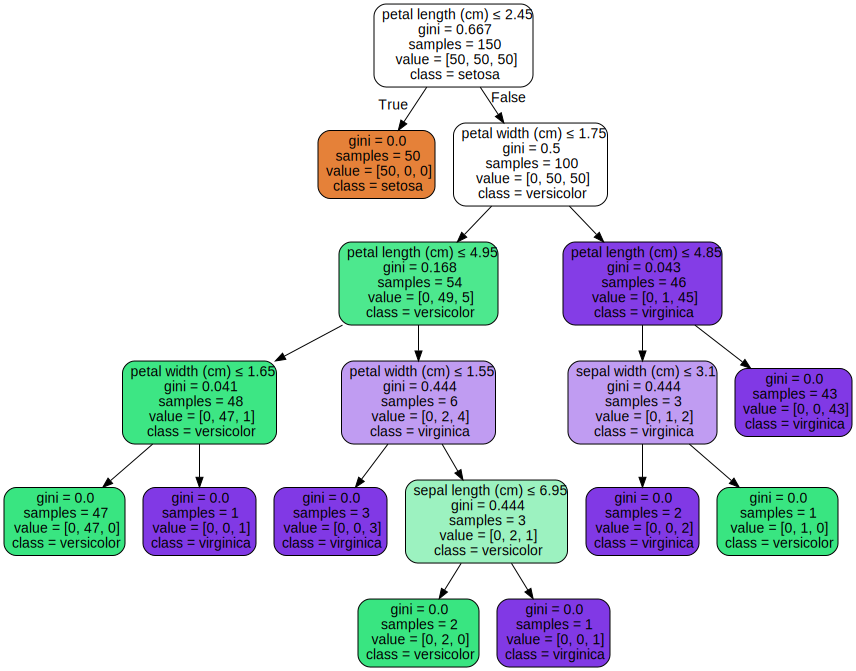

In [4]:
import graphviz
def plot_tree(clf):
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names,
                                    filled=True, rounded=True,
                                    special_characters=True)
    return graphviz.Source(dot_data)

graph = plot_tree(decision_tree)
graph

## Measures for Impurity

Let's use a smaller Decision Tree and try to recreate some values on it.

<table><tr>
<!-- <td> <img src="https://miro.medium.com/max/565/1*M15RZMSk8nGEyOnD8haF-A.png" alt="" style="width: 500px;"/> </td> -->
<td> <img src="https://qph.fs.quoracdn.net/main-qimg-93d3fa675b807bc505ef905c828d6c6d" alt="" style="width: 500px;"/> </td>
</tr></table>

<strong>Calculate the gini and entropy of the second branch (Petal width (cm) <= 1.75)</strong>

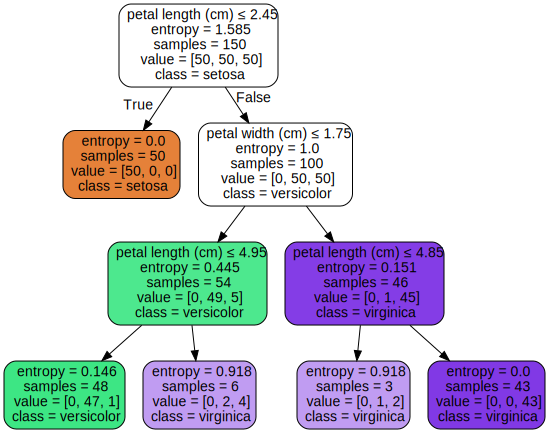

In [11]:
decision_tree = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
decision_tree = decision_tree.fit(X, y)
plot_tree(decision_tree)

## Calculation of Gini index & Entropy

In [6]:
import numpy as np
from collections import Counter

# def gini(labels):
#     mad = np.abs(np.subtract.outer(labels, labels)).mean()
#     # Relative mean absolute difference
#     rmad = mad/np.mean(labels)
#     # Gini coefficient
#     g = 0.5 * rmad
#     return g
#     # TODO: implement gini index calculation
#     # pass

# def entropy(values):
#     # TODO: implement entropy calculation
#     pass



# values = np.array([10, 10, 50, 10, 50, 10])
# gini(values)
# # print("Gini: {:.03}, Entropy: {:.04} ".format(gini(values), entropy(values)))

Let's use a smaller Decision Tree and try to recreate some values on it.

<table><tr>
<!-- <td> <img src="https://miro.medium.com/max/565/1*M15RZMSk8nGEyOnD8haF-A.png" alt="" style="width: 500px;"/> </td> -->
<td> <img src="https://qph.fs.quoracdn.net/main-qimg-93d3fa675b807bc505ef905c828d6c6d" alt="" style="width: 500px;"/> </td>
</tr></table>

<strong>Calculate the gini and entropy of the second branch (Petal width (cm) <= 1.75)</strong>

In [12]:
def gini(labels):
    # Calculate the Gini index for a list of labels
    total_samples = len(labels)
    label_counts = Counter(labels)
    gini_index = 1.0

    for label in label_counts:
        label_prob = label_counts[label] / total_samples
        gini_index -= label_prob ** 2

    return gini_index

def entropy(values):
    # Calculate the entropy for a list of values
    total_samples = len(values)
    value_counts = Counter(values)
    entropy_value = 0.0

    for value in value_counts:
        value_prob = value_counts[value] / total_samples
        entropy_value -= value_prob * np.log2(value_prob)

    return entropy_value

values = np.array([10, 10, 50, 10, 50, 10])

gini_result = gini(values)
entropy_result = entropy(values)

print("Gini: {:.03f}, Entropy: {:.04f}".format(gini_result, entropy_result))

Gini: 0.444, Entropy: 0.9183


## Calculation of Information Gain

In [13]:
def information_gain(parent, children):
    total = parent.sum()
    s = entropy(parent)
    for child in children:
        s -= child.sum()/total * entropy(child)
    return s
parent = np.array([50, 50, 50])
children = np.array([[50,0,0],[0,50,50]])
ig = information_gain(parent, children)
print("Information gain: {:.03}".format(ig))

Information gain: -0.918


## Regression Trees

Basic Concept:
* Split the data as before.
* To minimize the variance of the leaf node values.
* Take the mean as the prediction


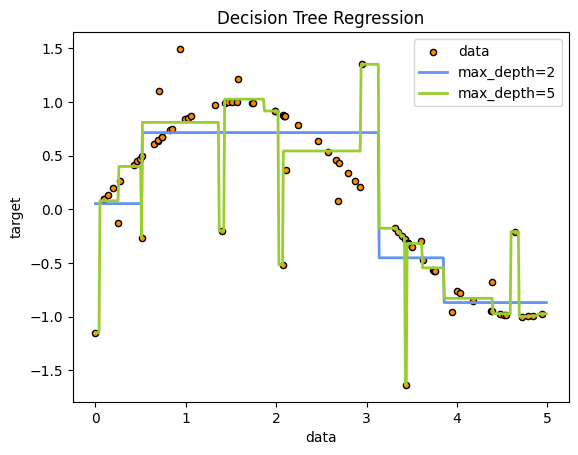

In [14]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 2. Comparison Between models
Now that you know multiple types of classifiers:
1. Linear
  * Logistic Regression
  * SVM-(with linear kernel)
2. Non-Linear
  * SVM-(with non linear kernel)
  * Decision Trees
  
Let's take a look how their decision boundaries look like.

## Comparison on iris dataset

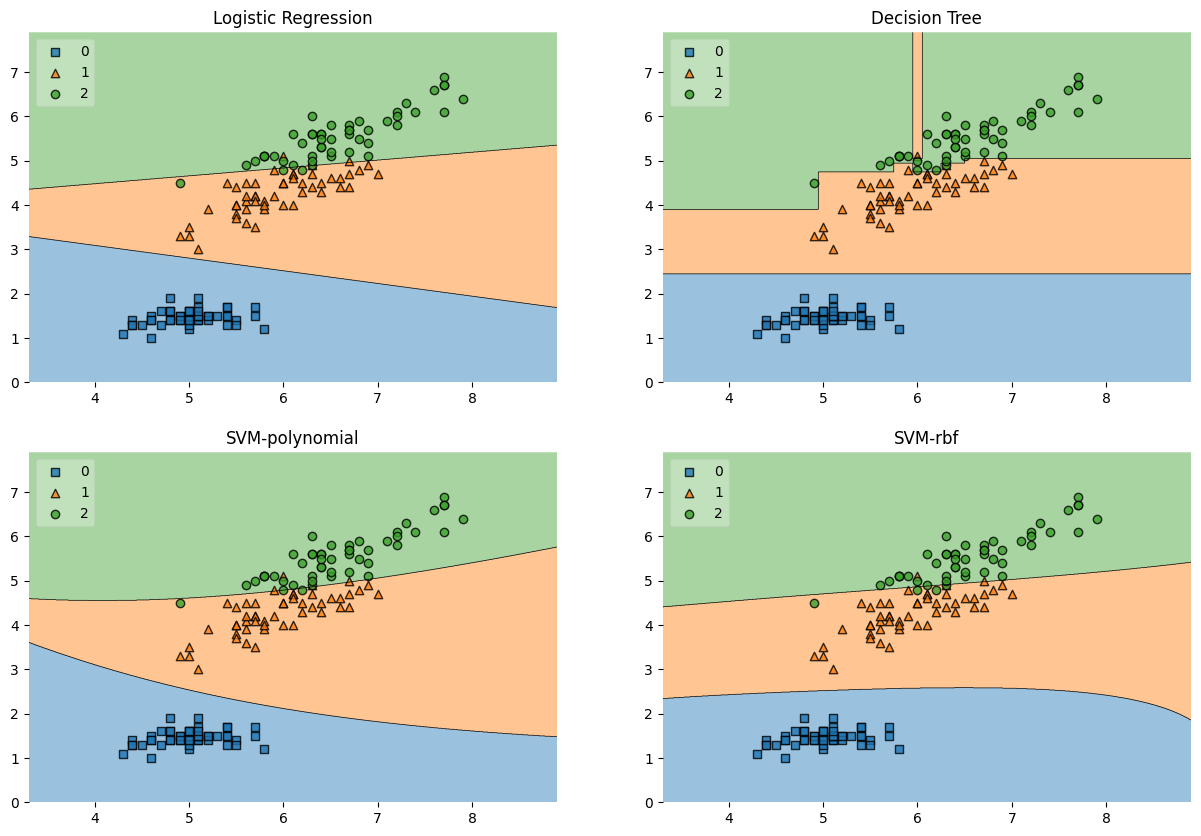

In [15]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

def compare_models(X,y):
    clf1 = LogisticRegression()
    clf2 = DecisionTreeClassifier()
    clf3 = SVC(kernel='poly', degree=3)
    clf4 = SVC(kernel='rbf')

    gs = gridspec.GridSpec(2, 2)

    fig = plt.figure(figsize=(15, 10))

    labels = ['Logistic Regression', 'Decision Tree', 'SVM-polynomial', 'SVM-rbf']
    for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                             labels,
                             itertools.product([0, 1], repeat=2)):
        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
        plt.title(lab)

compare_models(X,y)
plt.show()

## Comparison on logical_xor

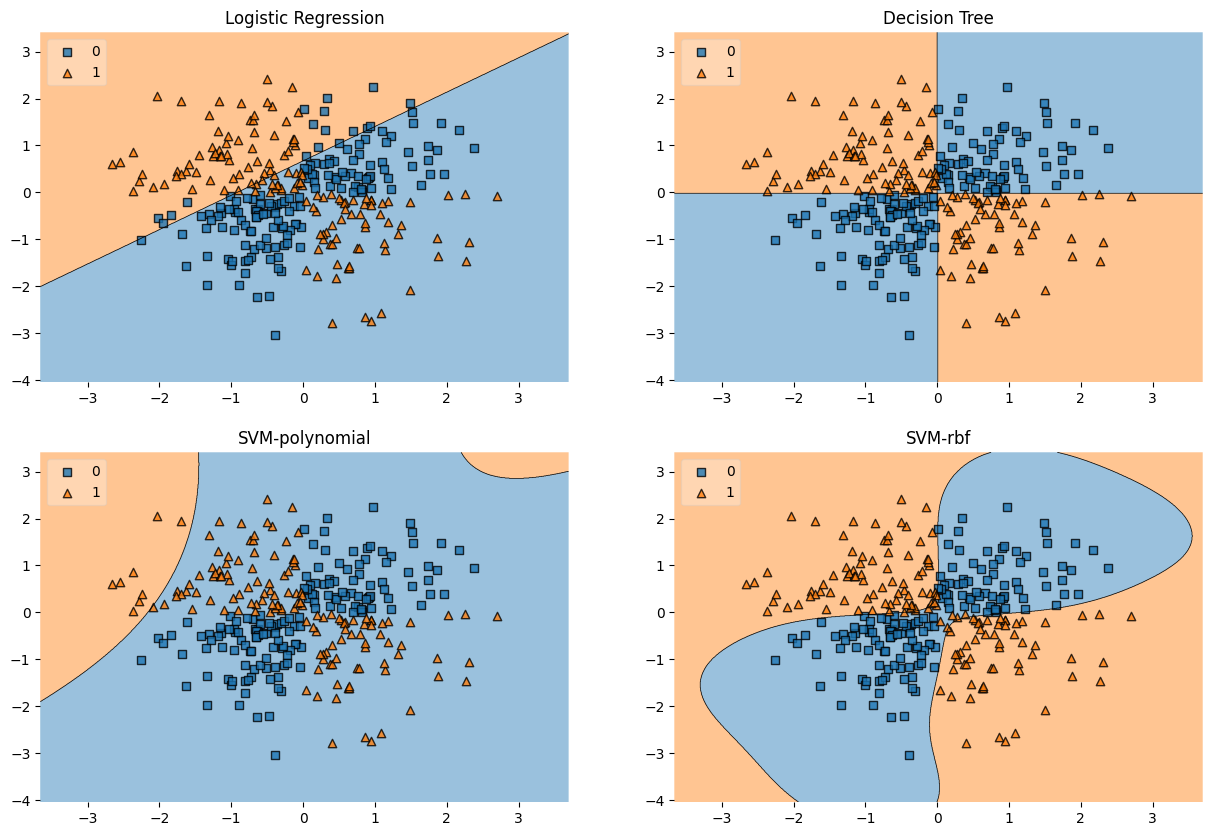

In [16]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),
             dtype=int)

compare_models(X,y)

## Comparison on Moons data

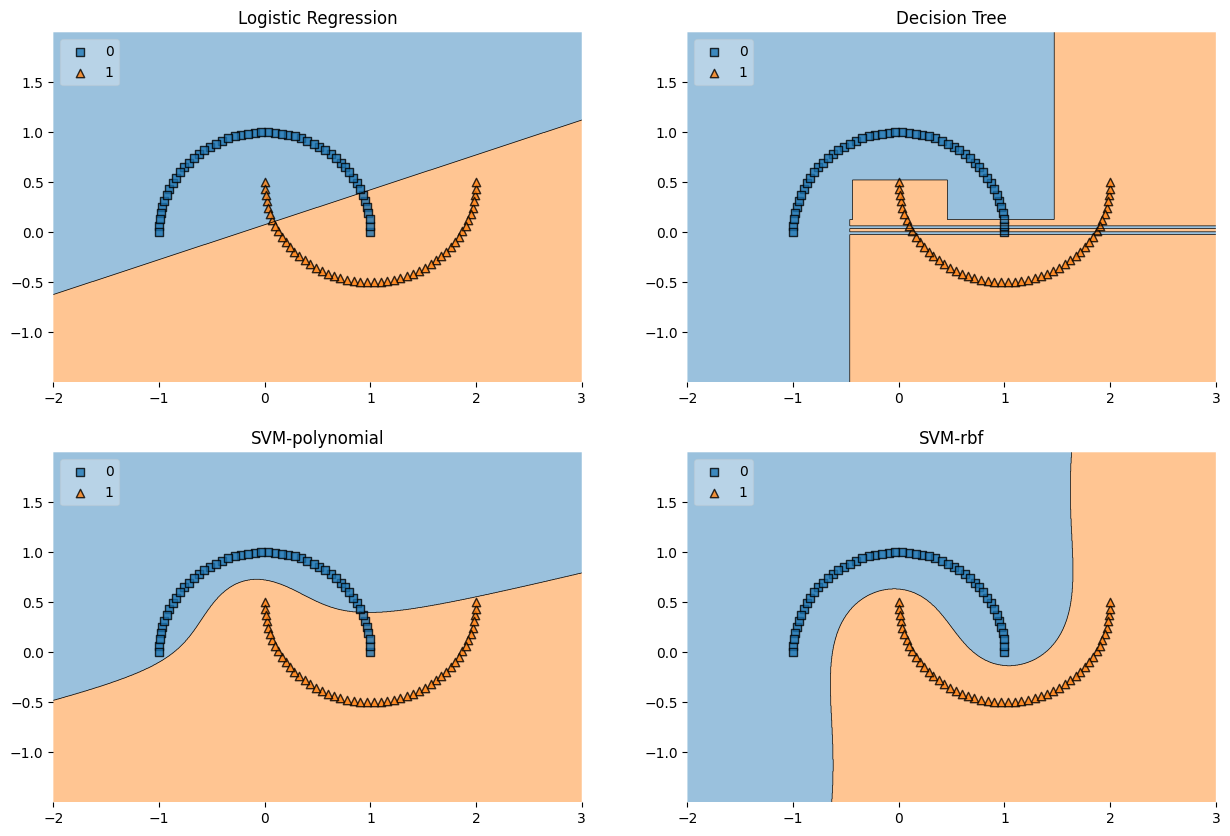

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

compare_models(X,y)

## Comparison on Circles data

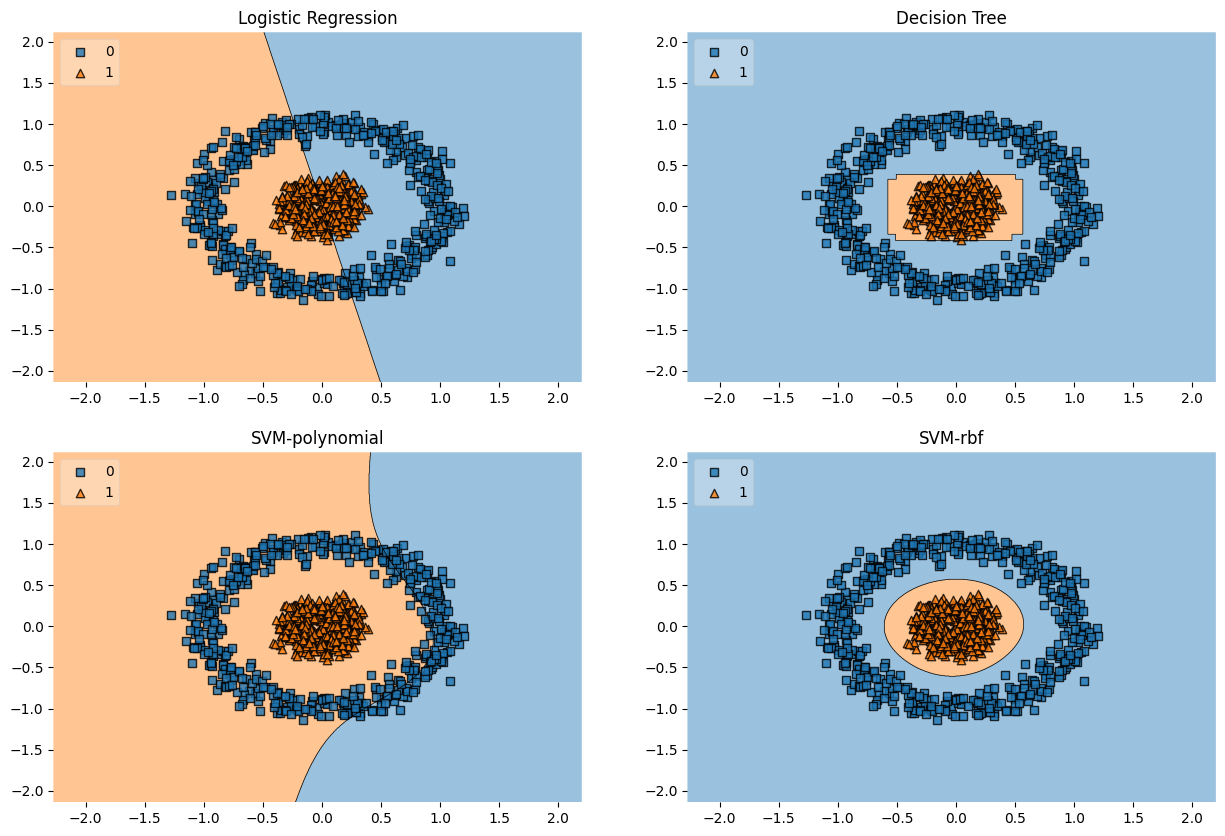

In [20]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

compare_models(X,y)

## Self-practice

Using 10% sample from 2nd assignment dataset (task 1) and `status_time` as target variable (**note** for `early delivery` set `status_time` to negative value). Apply the following models:

1. Regression tree
2. SVM (use kernel of your choice)
3. Simple Neural Network (with two or three hidden layers)

Compare the ML models using the appropriate metrics